In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv('2021-04-22_copy.csv', index_col=0)
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,USA,32551107,14637,582665,209,25108546,3011,6859896,10036,97881,1752,432173530,1299541,332558517,North America
1,India,15880534,271530,184168,1598,13405177,135314,2291189,8944,11418,132,271053392,194881,1390864355,Asia
2,Brazil,14050885,0,378530,0,12561689,0,1110666,8318,65729,1771,28600000,133789,213770046,South America
3,France,5339920,0,101597,0,4181006,0,1057317,5984,81663,1554,72873077,1114447,65389433,Europe
4,Russia,4727125,8271,106706,399,4352873,9644,267546,2300,32381,731,126500000,866529,145984714,Europe


#### Ta sẽ chọn ra top 10 nước có số ca nhiễm mới cao nhất để trực quan

In [3]:
top_10_df = df.sort_values(by=['NewCases'], ascending=False).iloc[0:10]
top_10_df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
1,India,15880534,271530,184168,1598,13405177,135314,2291189,8944,11418,132,271053392,194881,1390864355,Asia
5,Turkey,4446591,61967,36975,362,3844342,52213,565274,3398,52273,435,44728595,525815,85065229,Asia
13,Iran,2311813,24886,67913,388,1823958,13427,419942,4991,27245,800,14739719,173710,84852500,Asia
9,Germany,3200025,19215,81308,222,2824100,20500,294617,4932,38096,968,52737238,627833,83998886,Europe
0,USA,32551107,14637,582665,209,25108546,3011,6859896,10036,97881,1752,432173530,1299541,332558517,North America
11,Poland,2718493,13926,63473,740,2366230,11578,288790,3265,71892,1679,13767550,364093,37813307,Europe
7,Italy,3904899,13844,117997,364,3311267,20552,475635,3076,64661,1954,55885251,925400,60390385,Europe
15,Ukraine,1974118,12162,40796,429,1514472,14720,418850,177,45359,937,8996039,206699,43522336,Europe
8,Spain,3446072,10232,77364,148,3151587,4306,217121,2288,73682,1654,44374223,948789,46769321,Europe
25,Philippines,962307,9227,16265,124,829608,19699,116434,750,8689,147,11294085,101981,110746960,Asia


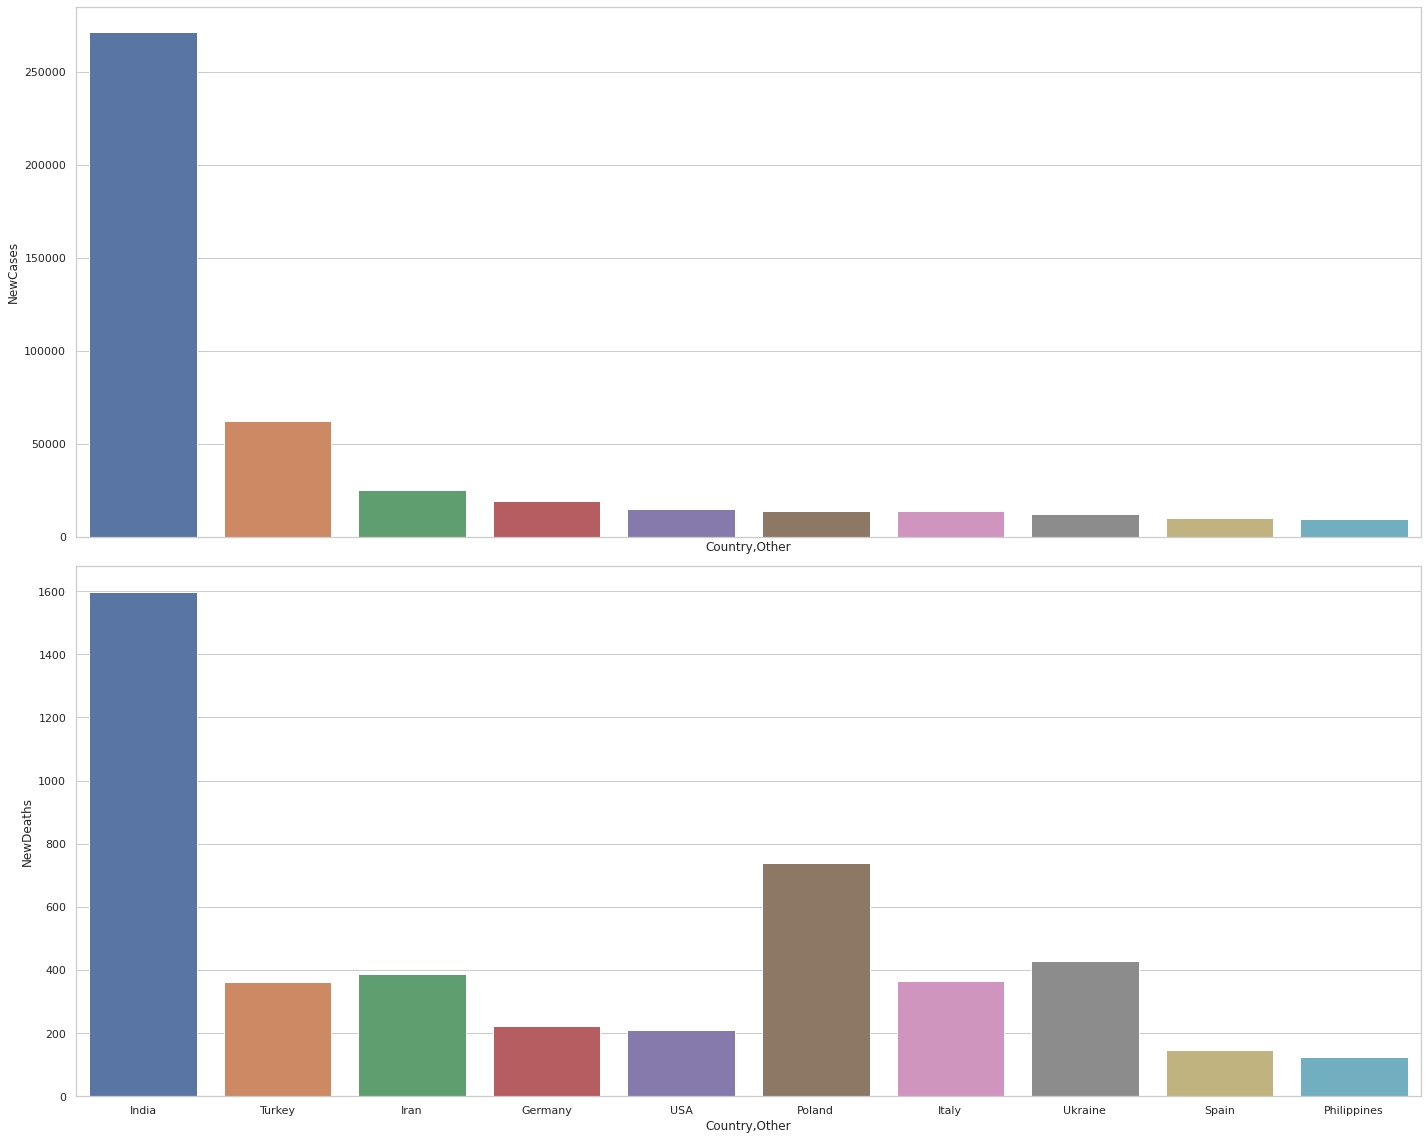

In [7]:
f, axs = plt.subplots(2,1,
                      figsize=(20,16),
                      sharex=True,
                      gridspec_kw=dict(height_ratios=[1,1]))

# biểu đồ số ca nhiễm mới
sns.barplot(x= 'Country,Other', y="NewCases", data=top_10_df, ax=axs[0])

# biểu đồ số ca chết mới
sns.barplot(x= 'Country,Other', y="NewDeaths", data=top_10_df, ax=axs[1])

f.tight_layout()

### Qua biểu đồ có thể thấy số ca nhiễm mới ở Châu Phi và Thổ Nhĩ Kỳ có sự tăng vọt bất thường so với các nước khác. 2 nước này có điểm chung đều ở Châu Á (Asia).

([<matplotlib.patches.Wedge at 0x7f9a64f7dd00>,
 [Text(0.503683630706749, 0.9779073576561674, 'India'),
  Text(-0.8390846890743983, 0.7112924044026625, 'Turkey'),
  Text(-1.0803801312890804, 0.20683029738360326, 'Iran'),
  Text(-1.0713074606416992, -0.2496003300747698, 'Germany'),
  Text(-0.9522507898837431, -0.5506527337313304, 'USA'),
  Text(-0.42443175725471255, -1.0148190397473222, 'Poland'),
  Text(0.38800413377786247, -1.029297232178971, 'Italy'),
  Text(0.8643617463805546, -0.6803519467113754, 'Ukraine'),
  Text(1.0597378993598439, -0.29488232341119697, 'Spain'),
  Text(1.0960303184122384, -0.093367773461552, 'Philippines')])

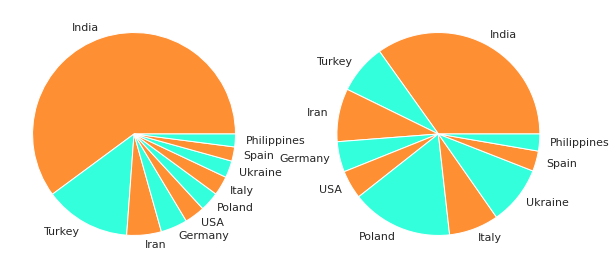

In [57]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

colors = ['#FF8F33','#33FFDC']
explode = (0.1, 0)

# tỉ lệ số ca nhiễm mới của top 10 nước có số ca nhiễm cao nhất
labels = top_10_df['Country,Other']
values = top_10_df['NewCases']
ax1.pie(values, labels = labels, colors = colors)

# tỉ lệ số ca chết mới của top 10 nước có số ca nhiễm cao nhất
labels = top_10_df['Country,Other']
values = top_10_df['NewDeaths']
ax2.pie(values, labels = labels, colors = colors)

### Dựa vào biểu đồ có thể thấ y không có mối quan hệ nhân quả giữa số ca nhiễm mới và số ca chết mới ở top 10 nước có số ca nhiễm cao nhất

Tiếp theo, ta sẽ tính tỉ lệ của các ca "mới" (mới nhiễm, mới hồi phục, mới chết) so với các ca nhiễm hiện tại (Active Cases)

In [29]:
ratio_df = pd.DataFrame([])
ratio_df = top_10_df.iloc[:, [0, 7, 2, 4, 6]]
ratio_df['ratio_new']=top_10_df['NewCases']/top_10_df['ActiveCases']*100
ratio_df['ratio_new_recovered']=top_10_df['NewRecovered']/top_10_df['ActiveCases']*100
ratio_df['ratio_new_death']=top_10_df['NewDeaths']/top_10_df['ActiveCases']*100
ratio_df

<ipython-input-29-85c1d13e019a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_df['ratio_new']=top_10_df['NewCases']/top_10_df['ActiveCases']*100
<ipython-input-29-85c1d13e019a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_df['ratio_new_recovered']=top_10_df['NewRecovered']/top_10_df['ActiveCases']*100
<ipython-input-29-85c1d13e019a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,"Country,Other",ActiveCases,NewCases,NewDeaths,NewRecovered,ratio_new,ratio_new_recovered,ratio_new_death
1,India,2291189,271530,1598,135314,11.851052,5.905842,0.069745
5,Turkey,565274,61967,362,52213,10.962294,9.236760,0.064040
13,Iran,419942,24886,388,13427,5.926056,3.197346,0.092394
9,Germany,294617,19215,222,20500,6.522027,6.958186,0.075352
0,USA,6859896,14637,209,3011,0.213371,0.043893,0.003047
11,Poland,288790,13926,740,11578,4.822189,4.009142,0.256242
7,Italy,475635,13844,364,20552,2.910635,4.320960,0.076529
15,Ukraine,418850,12162,429,14720,2.903665,3.514385,0.102423
8,Spain,217121,10232,148,4306,4.712580,1.983226,0.068165
25,Philippines,116434,9227,124,19699,7.924661,16.918598,0.106498


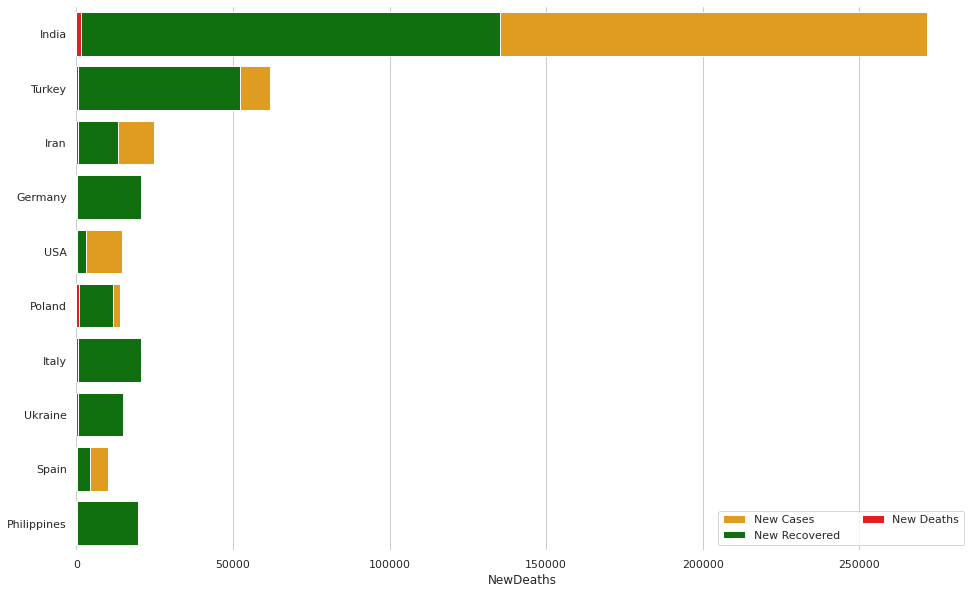

In [55]:
f, ax = plt.subplots(figsize=(16, 10))
sns.set_theme(style="whitegrid")

sns.barplot(x="NewCases", y="Country,Other", data=ratio_df,
            label="New Cases", color="orange")

sns.barplot(x="NewRecovered", y="Country,Other", data=ratio_df,
            label="New Recovered", color="green")

sns.barplot(x="NewDeaths", y="Country,Other", data=ratio_df,
            label="New Deaths", color="red")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="")
sns.despine(left=True, bottom=True)

### Qua biểu đồ có thể thấy tỉ lệ hồi phục của đa số nước ở top 10 số lượng ca nhiễm mới đều cao trong khi tỉ lệ chết lại rất thấp (<1%). Chứng tỏ việc điều trị dịch bệnh hiện nay đã có sự kiểm soát, không quá khó trong việc điều trị nhưng việc phòng dịch để tránh lây nhiễm lại chưa tốt ở một vài nước.